In [3]:
import numpy as np
import scipy.stats as stats
import scipy.linalg as linalg
import matplotlib.pyplot as plt
from mpmath import *
from mpl_toolkits.mplot3d import Axes3D
% matplotlib inline

In [4]:
def sample_vMF(mu, kappa, nsteps):

    #This function generates a random m-vector on an n-sphere
    #Output is in cartesian coordinates
    dimension = len(mu)
    rand_vec = np.zeros((nsteps, dimension))
    for i in range(nsteps):
        
        # generate a sample off of the mean direction given a concetration kappa

        w = _sample_weight(kappa, dimension)

        # sample a point v on the unit sphere that's orthogonal to mu
        v = _sample_orthonormal_to(mu)

        # compute new point
        rand_vec[i, :] = v * np.sqrt(1. - w**2) + w * mu

    return rand_vec

def _sample_weight(kappa, dimension):

    S = dimension - 1
    b = (-2*kappa+(4*kappa**2+(S)**2)**(1/2))/(S)
    x = (1. - b) / (1. + b)
    c = kappa * x + S * np.log(1 - x**2)

    while True:
        z = np.random.beta(S / 2, S / 2)
        w = (1 - (1 + b) * z) / (1 - (1 - b) * z)
        u = np.random.uniform(0, 1)
        if kappa * w + S * np.log(1. - x * w) - c >= np.log(u):
            return w

def _sample_orthonormal_to(mu):

    v = np.random.randn(mu.shape[0])
    proj_mu_v = mu * np.dot(mu, v) / np.linalg.norm(mu)
    orthto = v - proj_mu_v
    return orthto / np.linalg.norm(orthto)

In [5]:
#Define number of steps, concentration parameter, and mean direction

n_steps = 100000
kappa = 0
mu_initial = np.array([0, 0, 1])

steps = np.zeros((n_steps, len(mu_initial)))



In [6]:
#Generate Samples

for i in range(n_steps):
    
    if i == 0:
        
        initial_step = sample_vMF(mu_initial, kappa, 1)
        
        steps[i] = initial_step
        

        
    else:
        
        
        mu = steps[i-1]
        


        step = sample_vMF(mu, kappa, 1)
        

        
        steps[i] = step


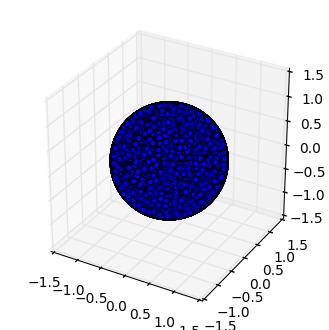

In [7]:
#Plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(steps[:, 0], steps[:, 1], steps[:, 2])
ax.set_aspect('equal')
